<a href="https://colab.research.google.com/github/hsantos1985/Datasets_analysis/blob/main/An%C3%A1lise_dataset_veiculos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O objetivo da análise é encontrar conclusões iniciais do dataset

"The period between 1970 and 1982 marked a significant shift in the United States car industry. American production shifted from heavy, powerful six- and eight-cylinder cars with poor gas mileage to lighter, less powerful, four-cylinder cars with higher fuel efficiency. The global auto industry–including Americans and their European and Japanese competitors–raised overall miles per gallon (MPG) by focusing on four-cylinder cars and making them more fuel efficient."



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

1 - Realizando a leitura incial do dataframe, explorando as informações e tipos das variáveis



In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/abnr/ml-data/main/auto_industry.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
#análise descritiva dos dados
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
#análise dos types das variáveis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
#análise das linhas iniciais do dataframe
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


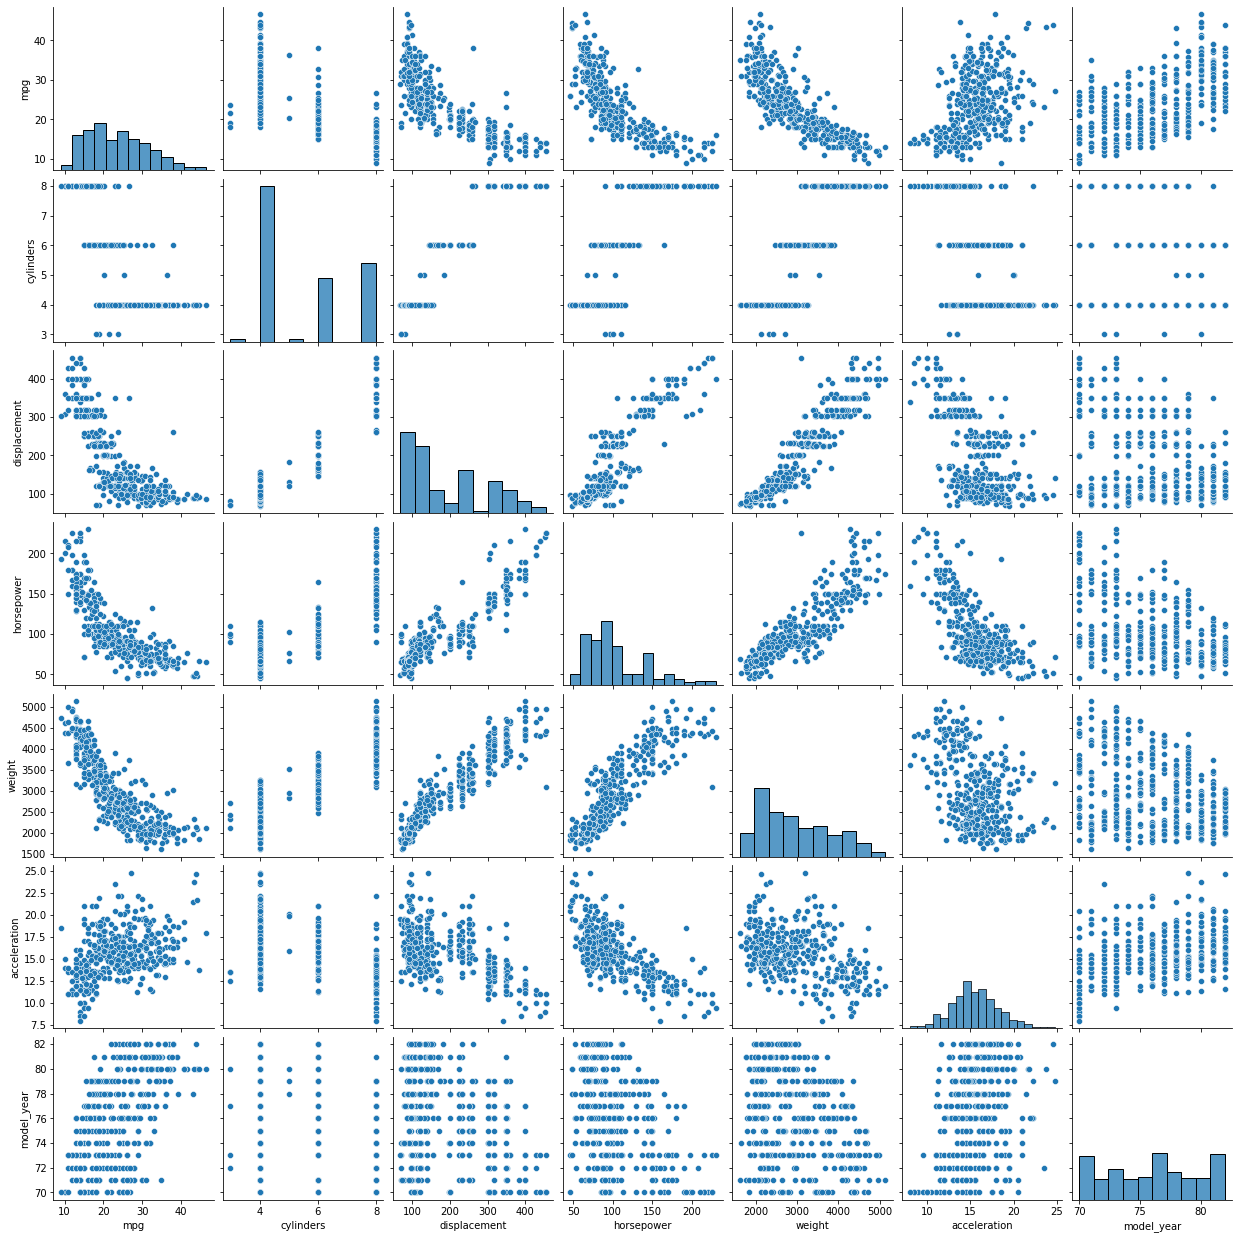

In [ ]:
#analisando a relação entre as variáveis graficamente

sns.pairplot(data);

#Verifica-se que as variável 'mpg' possui correlação com displacement, horsepower, weight e acceleration


2-Busca de valores faltantes do dataframe


In [ ]:
#verificando os dados faltantes nas variáveis

data.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

In [ ]:
#contagem dos fdados faltantes por variável
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


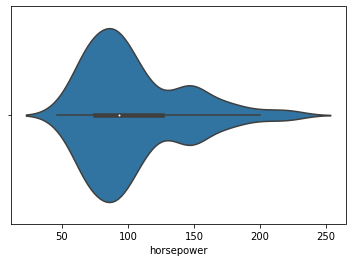

In [ ]:
#analisando o distribuição da variável horsepower

sns.violinplot(data['horsepower']);

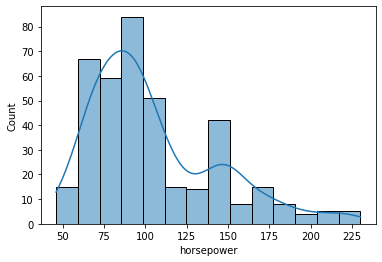

In [ ]:
sns.histplot(data['horsepower'],kde=True);

In [ ]:
#verificando os valores nulos 
data[data['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [ ]:
#inserindo nos valores nulos as médias do horsepower do respectivo model_year
data['horsepower']=data.groupby('model_year')['horsepower'].apply(lambda grp:grp.fillna(np.mean(grp)))

In [ ]:
#verificando se a variável receb os valores 
data.loc[data['model_year']==80]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
309,41.5,4,98.0,76.000000,2144,14.7,80,europe,vw rabbit
310,38.1,4,89.0,60.000000,1968,18.8,80,japan,toyota corolla tercel
311,32.1,4,98.0,70.000000,2120,15.5,80,usa,chevrolet chevette
312,37.2,4,86.0,65.000000,2019,16.4,80,japan,datsun 310
313,28.0,4,151.0,90.000000,2678,16.5,80,usa,chevrolet citation
314,26.4,4,140.0,88.000000,2870,18.1,80,usa,ford fairmont
315,24.3,4,151.0,90.000000,3003,20.1,80,usa,amc concord
316,19.1,6,225.0,90.000000,3381,18.7,80,usa,dodge aspen
317,34.3,4,97.0,78.000000,2188,15.8,80,europe,audi 4000
318,29.8,4,134.0,90.000000,2711,15.5,80,japan,toyota corona liftback


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


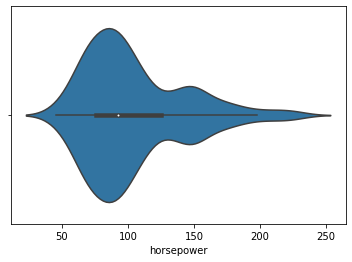

In [ ]:
#análise gráfica da distribuição do horsepower depois da inserção dos valores
#verifica-se que não houve alteração na distribuição da variável 'horsepower'

sns.violinplot(data['horsepower']);

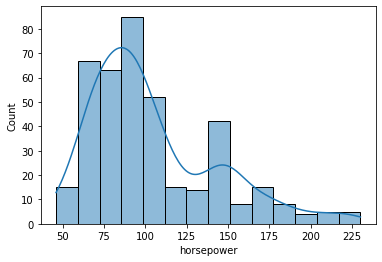

In [ ]:
sns.histplot(data['horsepower'],kde=True);

In [ ]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

3 - Análise da quantidade de modelos lançados por ano

In [ ]:
#análise da quantidade de modelos duplicados
data['model_year'].value_counts().sort_index()

70    29
71    28
72    28
73    40
74    27
75    30
76    34
77    28
78    36
79    29
80    29
81    29
82    31
Name: model_year, dtype: int64

In [ ]:
#verificação da quantidade de modelos únicos
data['name'].head().unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino'], dtype=object)

In [ ]:
data['name'].head().nunique()

5

4 - Criando coluna de marca e nome

In [ ]:
data[['company','veículo']]=data['name'].str.split(" ", n=1, expand=True)

In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,company,veículo
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,torino


5 - Verificando a correlação entre consumo e aceleração

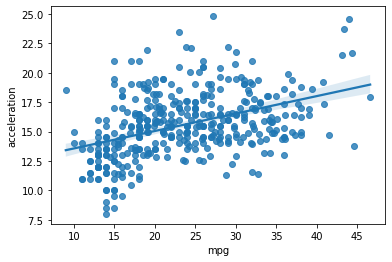

In [ ]:
sns.regplot(data=data,x='mpg',y='acceleration');

6 - Agrupando dados de acordo com a origin

In [ ]:
#deixando as priemria sletras maiusculas da coluan 'origin'
data['origin']=data['origin'].str.title()
data[data['origin']=='Usa']


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,company,veículo
0,18.0,8,307.0,130.0,3504,12.0,70,Usa,chevrolet chevelle malibu,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,Usa,buick skylark 320,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,Usa,plymouth satellite,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,Usa,amc rebel sst,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,Usa,ford torino,ford,torino
...,...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,151.0,90.0,2950,17.3,82,Usa,chevrolet camaro,chevrolet,camaro
393,27.0,4,140.0,86.0,2790,15.6,82,Usa,ford mustang gl,ford,mustang gl
395,32.0,4,135.0,84.0,2295,11.6,82,Usa,dodge rampage,dodge,rampage
396,28.0,4,120.0,79.0,2625,18.6,82,Usa,ford ranger,ford,ranger


7 - Executando da mesma de outra forma

In [ ]:
data.groupby(['origin']).get_group('Usa')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,company,veículo
0,18.0,8,307.0,130.0,3504,12.0,70,Usa,chevrolet chevelle malibu,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,Usa,buick skylark 320,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,Usa,plymouth satellite,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,Usa,amc rebel sst,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,Usa,ford torino,ford,torino
...,...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,151.0,90.0,2950,17.3,82,Usa,chevrolet camaro,chevrolet,camaro
393,27.0,4,140.0,86.0,2790,15.6,82,Usa,ford mustang gl,ford,mustang gl
395,32.0,4,135.0,84.0,2295,11.6,82,Usa,dodge rampage,dodge,rampage
396,28.0,4,120.0,79.0,2625,18.6,82,Usa,ford ranger,ford,ranger


8 - Verificando a existência de duplicados no dataframe

In [ ]:
data.duplicated().sum()

0

9 - Criando uma nova coluna de Km/L

In [ ]:
data['Km/L']=round((data['mpg']*0.425144),2)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,company,veículo,Km/L
0,18.0,8,307.0,130.0,3504,12.0,70,Usa,chevrolet chevelle malibu,chevrolet,chevelle malibu,7.65
1,15.0,8,350.0,165.0,3693,11.5,70,Usa,buick skylark 320,buick,skylark 320,6.38
2,18.0,8,318.0,150.0,3436,11.0,70,Usa,plymouth satellite,plymouth,satellite,7.65
3,16.0,8,304.0,150.0,3433,12.0,70,Usa,amc rebel sst,amc,rebel sst,6.80
4,17.0,8,302.0,140.0,3449,10.5,70,Usa,ford torino,ford,torino,7.23


10 - Analisando o consumo entre Km/l por ano e número de cilindros

In [ ]:
data_pt=pd.pivot_table(data, values='Km/L', index=['model_year','cylinders'],
                      aggfunc=np.mean)
round(data_pt,2)

Km/L
model_year cylinders       
70         4          10.75
           6           8.72
           8           6.00
71         4          11.67
           6           7.65
           8           5.71
72         3           8.08
           4           9.96
           8           5.79
73         3           7.65
           4           9.66
           6           8.08
           8           5.61
74         4          11.82
           6           7.59
           8           6.04
75         4          10.74
           6           7.48
           8           6.66
76         4          11.38
           6           8.50
           8           6.24
77         3           9.14
           4          12.37
           6           8.29
           8           6.80
78         4          12.57
           5           8.63
           6           8.11
           8           8.10
79         4          13.40
           5          10.80
           6           9.76
           8           7.92
80         3          10.08
           4          14.71
           5          15.48
           6          11.01
81         4          13.95
           6           9.96
           8          11.31
82         4          13.64
           6          12.05

In [ ]:
#deixando as colunas por cilindros
data.pivot_table( values='Km/L', index='model_year', columns='cylinders' )

cylinders,3,4,5,6,8
model_year,,,,,
70,NaN,10.748571,NaN,8.715000,5.999444
71,NaN,11.673846,NaN,7.652500,5.708571
72,8.08,9.959286,NaN,NaN,5.790000
73,7.65,9.660909,NaN,8.076250,5.613000
74,NaN,11.816667,NaN,7.591429,6.036000
75,NaN,10.735000,NaN,7.475833,6.660000
76,NaN,11.379333,NaN,8.502000,6.235556
77,9.14,12.374286,NaN,8.292000,6.802500
78,NaN,12.572941,8.63,8.108333,8.100000


Através das análises verifica-se que entre os anos de 1970 a 1982 os veículos com 4 cilindros possuem kilometragem/milhas maior que os outros carros. 
A segunda maior média se refere aos veículos com 5 cilindros. 
Contudo, estes possuem apenas modelos nos anos de 1978 a 1980

In [ ]:
data_2=data.pivot_table( values='Km/L', index='model_year', columns='cylinders' )
data_2.loc[70:82].mean()

cylinders
3     8.737500
4    12.047930
5    11.636667
6     8.932223
8     6.925006
dtype: float64

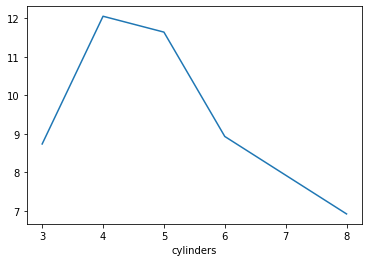

In [ ]:
data_2.loc[70:82].mean().plot();

11 - Analisando o consumo entre Km/l por origem, ano e número de cilindros

In [ ]:
data[['model_year','Km/L','origin']].groupby(['origin','model_year']).mean()

Km/L
origin model_year           
Europe 70          10.712000
       71          12.220000
       72           9.352000
       73          10.201429
       74          11.476667
       75          10.416667
       76          10.308750
       77          12.437500
       78          10.606667
       79          12.945000
       80          15.852222
       81          13.425000
       82          17.010000
Japan  70          10.840000
       71          12.542500
       72          10.288000
       73           8.500000
       74          12.468333
       75          11.690000
       76          11.902500
       77          11.653333
       78          12.620000
       79          14.010000
       80          15.050769
       81          14.011667
       82          14.833333
Usa    70           6.493182
       71           7.694500
       72           6.921111
       73           6.392414
       74           7.793333
       75           7.461500
       76           8.261364
       77           8.810556
       78           9.257727
       79           9.981304
       80          11.015714
       81          11.703077
       82          12.520500

In [ ]:
data[['Km/L','origin','cylinders']].groupby(['origin','cylinders']).mean().round(2)

Km/L
origin cylinders       
Europe 4          12.08
       5          11.64
       6           8.54
Japan  3           8.74
       4          13.43
       6          10.15
Usa    4          11.84
       6           8.36
       8           6.36

13- Criando classes de intervalo bianuais para verificar a evolução do consumo por esta categorização

In [ ]:
#criando a classe de anos pelo pd cut
# para tanto utiliza-se data['year_group'] = pd.cut(data['model_year'], bins), porém se faz necessário automatizar a escolha do bins

classe_ano=[]
for ano in range(data['model_year'].min(),(data['model_year'].max()+1),2):
   classe_ano.append((ano,ano+1))


intervalo=pd.IntervalIndex.from_tuples(classe_ano, closed='both')

In [ ]:
data['year_group']=pd.cut(data['model_year'],intervalo)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,company,veículo,Km/L,year_group
0,18.0,8,307.0,130.0,3504,12.0,70,Usa,chevrolet chevelle malibu,chevrolet,chevelle malibu,7.65,"[70, 71]"
1,15.0,8,350.0,165.0,3693,11.5,70,Usa,buick skylark 320,buick,skylark 320,6.38,"[70, 71]"
2,18.0,8,318.0,150.0,3436,11.0,70,Usa,plymouth satellite,plymouth,satellite,7.65,"[70, 71]"
3,16.0,8,304.0,150.0,3433,12.0,70,Usa,amc rebel sst,amc,rebel sst,6.80,"[70, 71]"
4,17.0,8,302.0,140.0,3449,10.5,70,Usa,ford torino,ford,torino,7.23,"[70, 71]"


In [ ]:
data.pivot_table(values='Km/L', index=['origin','cylinders'], columns='year_group' )

year_group         [70, 71]   [72, 73]  ...   [80, 81]   [82, 83]
origin cylinders                        ...                      
Europe 4          11.382222   9.847500  ...  15.258182  17.010000
       5                NaN        NaN  ...  15.480000        NaN
       6                NaN        NaN  ...  13.050000        NaN
Japan  3                NaN   7.865000  ...  10.080000        NaN
       4          11.975000  10.201667  ...  15.177619  14.833333
       6                NaN   8.500000  ...  11.663333        NaN
Usa    4          10.542000   9.474286  ...  12.445714  12.604118
       6           8.006667   8.015714  ...   8.740000  12.046667
       8           5.918000   5.682727  ...  11.310000        NaN

[9 rows x 7 columns]

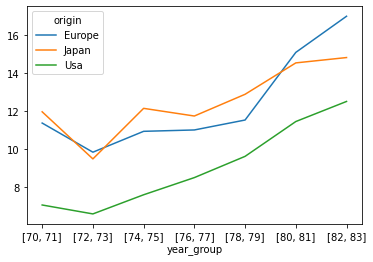

In [ ]:
#apresentando gráficamente a evolução por origin e classificação bianual

pd.pivot_table(data, values='Km/L', index=['year_group'],columns=['origin'], aggfunc=np.mean).plot();


Graficamente verifica-se que houve aumento da kilometragem a ser percorrida pelos veículos com 1 litro. Assim, os carros ficaram mais econômicos

14 - É possível analisar quais variaveis possuem ais correlação entre si para verificar, qual destas correlações apresentam maior causalidade com este aumento da kilometragem percorrida

In [ ]:
data.corr(method='pearson')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,Km/L
mpg,1.000000,-0.775396,-0.804203,-0.775488,-0.831741,0.420289,0.579267,1.000000
cylinders,-0.775396,1.000000,0.950721,0.842340,0.896017,-0.505419,-0.348746,-0.775316
displacement,-0.804203,0.950721,1.000000,0.896191,0.932824,-0.543684,-0.370164,-0.804130
horsepower,-0.775488,0.842340,0.896191,1.000000,0.862115,-0.685993,-0.418951,-0.775458
weight,-0.831741,0.896017,0.932824,0.862115,1.000000,-0.417457,-0.306564,-0.831687
acceleration,0.420289,-0.505419,-0.543684,-0.685993,-0.417457,1.000000,0.288137,0.420284
model_year,0.579267,-0.348746,-0.370164,-0.418951,-0.306564,0.288137,1.000000,0.579351
Km/L,1.000000,-0.775316,-0.804130,-0.775458,-0.831687,0.420284,0.579351,1.000000


In [ ]:
# verificando quais das correlações são maiores que 0.8

data_cor=data.corr(method='pearson').head().abs()

data_cor[data_cor.head()>=0.8]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,Km/L
mpg,1.000000,NaN,0.804203,NaN,0.831741,NaN,NaN,1.000000
cylinders,NaN,1.000000,0.950721,0.842340,0.896017,NaN,NaN,NaN
displacement,0.804203,0.950721,1.000000,0.896191,0.932824,NaN,NaN,0.804130
horsepower,NaN,0.842340,0.896191,1.000000,0.862115,NaN,NaN,NaN
weight,0.831741,0.896017,0.932824,0.862115,1.000000,NaN,NaN,0.831687


15 - Gerando boxplot e histograa para todos os elementos númericos do dataframe, a fim de verificar a distribuição dests variáveis

In [ ]:
data_2_box=data.loc[:,['mpg','displacement','horsepower','weight','acceleration','Km/L']]
data_2_box.head()

,mpg,displacement,horsepower,weight,acceleration,Km/L
0,18.0,307.0,130.0,3504,12.0,7.65
1,15.0,350.0,165.0,3693,11.5,6.38
2,18.0,318.0,150.0,3436,11.0,7.65
3,16.0,304.0,150.0,3433,12.0,6.80
4,17.0,302.0,140.0,3449,10.5,7.23


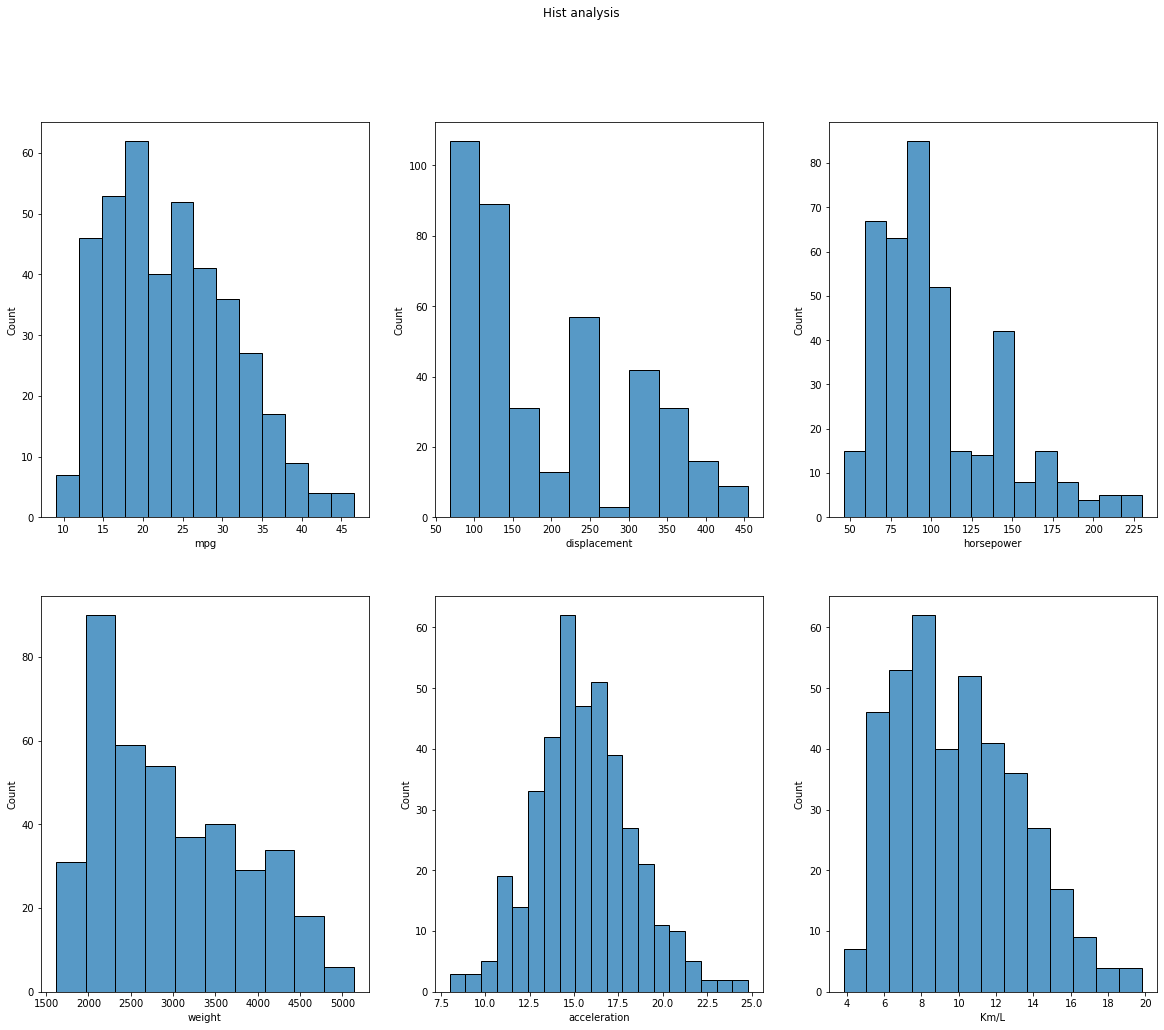

In [ ]:
# gráficos de histograma
cols=data_2_box.columns
columns=data_2_box.columns

fig, axes = plt.subplots(2,3, figsize=(20,16), sharey= False)

fig.suptitle('Hist analysis')

feature = 0
for row in range(0,2):
      for col in range(0,3):
        sns.histplot(ax=axes[row,col], data=data_2_box, x=cols[feature], multiple='stack')
        feature = feature + 1

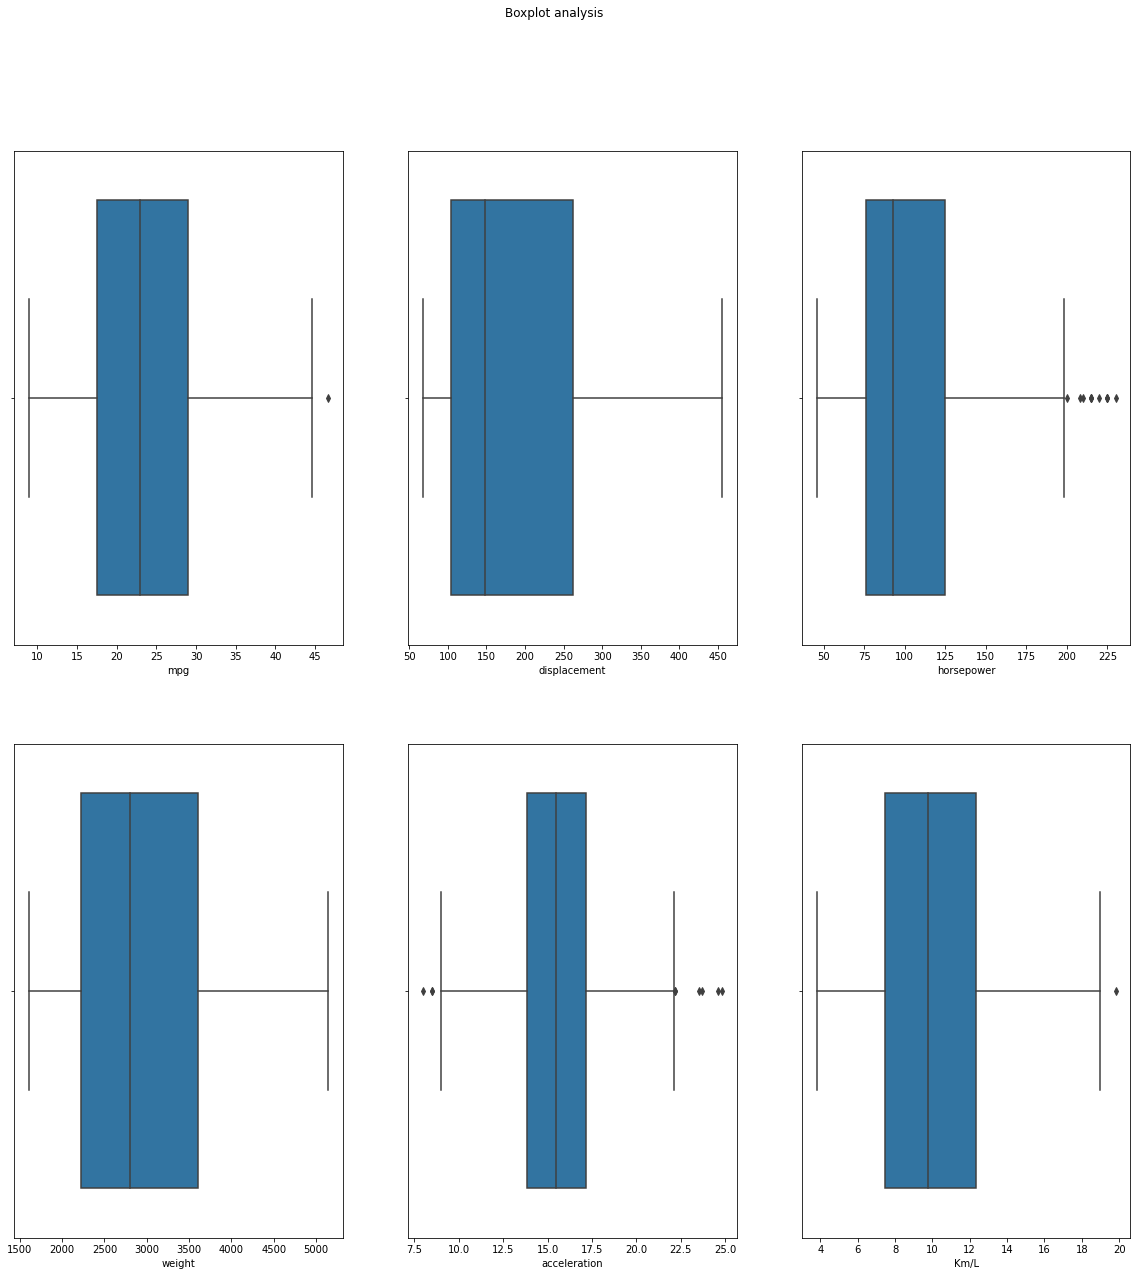

In [ ]:
#gráficos de boxplot
cols=data_2_box.columns
columns=data_2_box.columns

fig, axes = plt.subplots(2,3, figsize=(20,20), sharey= False)

fig.suptitle('Boxplot analysis')

feature = 0
for row in range(0,2):
      for col in range(0,3):
        sns.boxplot(ax=axes[row,col], data=data_2_box, x=cols[feature])
        feature = feature + 1